# I. Mạng nơ ron truy hồi (RNN - Recurrent Neural Network)

Trong lý thuyết về ngôn ngữ, ngữ nghĩa của một câu được tạo thành từ mối liên kết của những từ trong câu theo một cấu trúc ngữ pháp. Nếu xét từng từ một đứng riêng lẻ ta không thể hiểu được nội dụng của toàn bộ câu, nhưng dựa trên những từ xung quanh ta có thể hiểu được trọn vẹn một câu nói. Như vậy cần phải có một kiến trúc đặc biệt hơn cho các mạng nơ ron biểu diễn ngôn ngữ nhằm mục đích liên kết các từ liền trước với các từ ở hiện tại để tạo ra mối liên hệ xâu chuỗi. Mạng nơ ron truy hồi đã được thiết kế đặc biệt để giải quyết yêu cầu này:


<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-rolled.png" width="100px">
</img>
> **Hình 1: Mạng nơ ron truy hồi với vòng lặp**


Hình trên biểu diễn kiến trúc của một mạng nơ ron truy hồi. Trong kiến trúc này mạng nơ ron sử dụng một đầu vào $x_t$ và trả ra đầu ra là một $h_t$. Đầu vào được đấu với một thân mạng nơ ron $A$ có tính chất truy hồi và từ thân này sẽ trả ra kết quả $h_t$.

Vòng lặp $A$ ở thân mạng nơ ron là điểm mấu chốt trong nguyên lý hoạt động của mạng nơ ron truy hồi. Đây là chuỗi sao chép nhiều lần của cùng một kiến trúc nhằm cho phép các thành phần có thể kết nối liền mạch với nhau theo mô hình chuỗi. Đầu ra của vòng lặp trước chính là đầu vào của vòng lặp sau. Nếu trải phẳng thân mạng nơ ron $A$ ta sẽ thu được một mô hình dạng:

<img src='http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png' width="400px"></img>
> **Hình 2: Cấu trúc trải phẳng của mạng nơ ron truy hồi**

Kiến trúc mạng nơ ron truy hồi này tỏ ra khá thành công trong các tác vụ của deep learning như: Nhận diện dọng nói (*speech recognition*), các mô hình ngôn ngữ, mô hình dịch, chú thích hình ảnh (*image captioning*),....

# II. Hạn chế của mạng nơ ron truy hồi

Một trong những điểm đặc biệt của RNN đó là nó có khả năng kết nối các thông tin liền trước với nhiệm vụ hiện tại, chẳng hạn như trong câu văn: 'học sinh đang tới *trường học*'. Dường như trong một ngữ cảnh ngắn hạn, từ *trường học* có thể được dự báo ngay tức thì mà không cần thêm các thông tin từ những câu văn khác gần đó. Tuy nhiên có những tình huống đòi hỏi phải có nhiều thông tin hơn chẳng hạn như: 'hôm qua Bống đi học nhưng không mang áo mưa. Trên đường đi học trời mưa. Cặp sách của Bống bị *ướt*'. Chúng ta cần phải học để tìm ra từ *ướt* ở một ngữ cảnh dài hơn so với chỉ 1 câu. Tức là cần phải biết các sự kiện trước đó như *trời mưa*, *không mang áo mưa* để suy ra sự kiện bị *ướt*. Những sự liên kết ngữ nghĩa dài như vậy được gọi là `phụ thuộc dài hạn` (*long-term dependencies*).
Về mặt lý thuyết mạng RNN có thể giải quyết được những sự phụ thuộc trong dài hạn. Tuy nhiên trên thực tế RNN lại cho thấy khả năng học trong dài hạn kém hơn. Để hiểu thêm lý do tại sao mạng RNN lại không có khả năng học trong dài hạn cùng đọc bài [Leanring Long - Term Dependencies with Gradient Descent is Difficult](http://ai.dinfo.unifi.it/paolo//ps/tnn-94-gradient.pdf). Một trong những nguyên nhân chính được giải thích đó là sự triệt tiêu đạo hàm của hàm cost function sẽ diễn ra khi trải quả chuỗi dài các tính toán truy hồi. Một phiên bản mới của mạng RNN là mạng LSTM ra đời nhằm khắc phục hiện tường này nhờ một cơ chế đặc biệt.

# III. Mạng trí nhớ ngắn hạn định hướng dài hạn (LSTM - Long short term memory)

Mạng *trí nhớ ngắn hạn định hướng dài hạn* còn được viết tắt là LSTM làm một kiến trúc đặc biệt của RNN có khả năng học được sự phục thuộc trong dài hạn (*long-term dependencies*) được giới thiệu bởi [Hochreiter & Schmidhuber (1997)](http://www.bioinf.jku.at/publications/older/2604.pdf). Kiến trúc này đã được phổ biến và sử dụng rộng rãi cho tới ngày nay. LSTM đã tỏ ra khắc phục được rất nhiều những hạn chế của RNN trước đây về triệt tiêu đạo hàm. Tuy nhiên cấu trúc của chúng có phần phức tạp hơn mặc dù vẫn dữ được tư tưởng chính của RNN là sự sao chép các kiến trúc theo dạng chuỗi. 

Một mạng RNN tiêu chuẩn sẽ có kiến trúc rất đơn giản chẳng hạn như đối với kiến trúc gồm một tầng ẩn là hàm tanh như bên dưới.

<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-SimpleRNN.png" width="600px"></img>
> **Hình 3: Sự lặp lại kiến trúc module trong mạng RNN chứa một tầng ẩn**


LSTM cũng có một chuỗi dạng như thế nhưng phần kiến trúc lặp lại có cấu trúc khác biệt hơn. Thay vì chỉ có một tầng đơn, chúng có tới 4 tầng ẩn tương tác với nhau theo một cấu trúc đặc biệt.

<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png" width="600px">
</img>
>**Hình 4: Sự lặp lại kiến trúc module trong mạng LSTM chứa 4 tầng ẩn tương tác**

Các kí hiệu có thể diễn giải như sau:

<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM2-notation.png" width="600px"></img>
>**Hình 5: Diễn giải các kí hiệu trong đồ thị mạng nơ ron (áp dụng chung cho toàn bộ bài)**

Trong sở đồ tính toán trên, mỗi một phép tính sẽ triển khai trên một véc tơ. Trong đó hình tròn màu hồng biểu diễn một toán tử đối với véc tơ như phép cộng véc tơ, phép nhân véc tơ. Màu vàng thể hiện hàm activation mà mạng nơ ron sử dụng để học trong tầng ẩn. Kí hiệu 2 đường thẳng nhập vào thể hiện phép chập kết quả trong khi kí hiệu 2 đường thẳng rẽ nhánh thể hiện cho nội dung véc tơ trước đó được sao chép để đi tới một phần khác của mạng nơ ron.

# IV. Ý tưởng đằng sau LSTM

Ý tưởng chính của LSTM là thành phần ô trạng thái (cell state) được thể hiện qua đường chạy ngang qua đỉnh đồ thị như hình vẽ bên dưới:

<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-C-line.png" width="800px"></img>
>**Hình 6: Đường đi của ô trạng thái (cell state) trong mạng LSTM**

Ô trạng thái là một dạng băng chuyền chạy thẳng xuyên suốt toàn bộ chuỗi với chỉ một vài tương tác tuyến tính nhỏ giúp cho thông tin có thể chuyền dọc theo đồ thị mạng nơ ron ổn định.

LSTM có khả năng xóa và thêm thông tin vào ô trạng thái và điều chỉnh các luồng thông tin này thông qua các cấu trúc gọi là cổng.

Cổng là cơ chế đặc biệt để điều chỉnh luồng thông tin đi qua. Chúng được tổng hợp bởi một tầng ẩn của hàm activation sigmoid và với một toán tử nhân như đồ thị.

<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-gate.png" width="100px"></img>
>**Hình 7: Một cổng của hàm sigmoid trong LSTM**

Hàm sigmoid sẽ cho đầu ra là một giá trị xác xuất nằm trong khoảng từ 0 đến 1, thể hiện rằng có bao nhiêu phần thông tin sẽ đi qua cổng. Giá trị bằng 0 ngụ ý rằng không cho phép thông tin nào đi qua, giá trị bằng 1 sẽ cho toàn bộ thông tin đi qua.

Một mạng LSTM sẽ có 3 cổng có kiến trúc dạng này để bảo vệ và kiểm soát các ô trạng thái.

# V. Thứ tự các bước của LSTM

Bước đầu tiên trong LSTM sẽ quyết định xem thông tin nào chúng ta sẽ cho phép đi qua ô trạng thái (cell state). Nó được kiểm soát bởi hàm sigmoid trong một tầng gọi là cổng quên (*forget gate layer*). Đầu tiên nó nhận đầu vào là 2 giá trị $h_{t-1}$ và $x_t$ và trả về một giá trị nằm trong khoảng 0 và 1 cho mỗi giá trị của ô trạng thái $C_{t-1}$. Nếu giá trị bằng 1 thể hiện 'giữ toàn bộ thông tin' và bằng 0 thể hiện 'bỏ qua toàn bộ chúng'.

Trở lại ví dụ về ngôn ngữ, chúng ta đang cố gắng dự báo từ tiếp theo dựa trên toàn bộ những từ trước đó. Trong những bài toán như vậy, ô trạng thái có thể bao gồm loại của chủ ngữ hiện tại, để cho đại từ chính xác có thể được sử dụng (anh ấy, cô ấy hay tôi, bạn). Khi chúng ta nhìn thấy một chủ ngữ mới, chúng ta muốn quên đi loại của một chủ ngữ cũ.

<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-f.png" width="800px"></img>
>**Hình 8: Tầng cổng quên (*forget gate layer*)**

Bước tiếp theo chúng ta sẽ quyết định loại thông tin nào sẽ được lưu trữ trong ô trạng thái. Chúng ta sẽ có 2 phần. Phần đầu tiên là một tầng ẩn của hàm sigmoid được gọi là tầng cổng vào (*input gate layer*) quyết định chúng ta sẽ cập nhật giá trị nào. Tiếp theo, tầng ẩn hàm tanh sẽ tạo ra một véc tơ của một giá trị trạng thái mới $\tilde{C}_t$ mà có thể được thêm vào trạng thái. Trong bước tiếp theo chúng ta sẽ kết hợp kết quả của tầng này để tạo thành một cập nhật cho trạng thái.

Trong ví dụ của mô hình ngôn ngữ của chúng ta, chúng ta muốn thêm loại của một chủ ngữ mới vào ô trạng thái để thay thế phần trạng thái cũ mà chúng ta muốn quên đi.

<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-i.png" width="800px"></img>
>**Hình 9: Cập nhật giá trị cho ô trạng thái bằng cách kết hợp 2 kết quả từ tầng cổng vào và tẩng ẩn hàm tanh**

Đây là thời điểm để cập nhật một ô trạng thái cũ, $C_{t-1}$ sang một trạng thái mới $C_t$. Những bước trước đó đã quyết định làm cái gì, chúng ta chỉ cần thực hiện nó.

Chúng ta nhân trạng thái cũ với $f_t$, quên những thứ chúng ta quyết định để quên sớm hơn. Chúng ta thêm $i_t * \tilde{C}_t$. Đây là một giá trị đề cử mới được tính toán bằng bao nhiêu chúng ta quyết định để cập nhật mỗi giá trị trạng thái.

Trong trường hợp của mô hình ngôn ngữ, đó là nơi chúng ta đã thực tế loại bỏ thông tin về các chủ đề của loại cũ và thêm thông tin mới khi chúng ta quyết định trong bước trước đó.

<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-C.png" width="800px"></img>
>**Hình 10: Ô trạng thái mới**

Cuối cùng chúng ta cần quyết định xem chúng ta sẽ có gì ở đầu ra. Kết quả ở đầu ra sẽ dựa trên ô trạng thái của chúng ta, nhưng sẽ là một phiên bản được lọc. Đầu tiên, chúng ta chạy qua một tầng sigmoid nơi quyết định phần nào của ô trạng thái sẽ ở đầu ra. Sau đó, chúng ta đưa ô trạng thái qua hàm tanh (để chuyển giá trị về khoảng -1 và 1) và nhân nó với đầu ra của một cổng sigmoid, do đó chúng ta chỉ trả ra những phần mà chúng ta quyết định.

Đối với những mô hình ngôn ngữ, bởi vì nó chỉ nhìn vào chủ ngữ, nó có thể muốn thông tin đầu ra liên quan đến một động từ, trong trường hợp dự báo điều sẽ xảy ra tiếp theo. Chẳng hạn, Đó có thể trả về có hay không chủ ngữ là số ít hoặc số nhiều, để chúng ta biết dạng của động từ có thể được liên kết với những từ tiếp theo.

<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-o.png" width="800px"></img>
>**Hình 11: Điều chỉnh thông tin ở đầu ra thông qua hàm tanh**

# VI. Các biến thể của LSTM

Những gì mà chúng ta vừa mổ tả cho đến giờ là một mạng LSTM rất thông thường. Nhưng không phải toàn bộ LSTM đều tương tự như trên. Trên thực tế, có vẻ như hầu hết mọi bài báo liên quan đến LSTM đều sử dụng những version khác nhau đôi chút. Sự khác biệt là rất nhỏ nhưng rất đáng để đề cập một ít trong số nhứng kiến trúc này.

Một trong những biến thể nối tiếng nhất của LSTM được giới thiệu bởi [Gers & Schmidhuber (2000)](ftp://ftp.idsia.ch/pub/juergen/TimeCount-IJCNN2000.pdf) thêm một kết nối ống tiểu (*peehole connection*) để các cổng có thể kết nối trực tiếp đến các ô trạng thái.

<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-var-peepholes.png" width="800px"></img>
>**Hình 12: Kết nối ống tiểu (*peehole*) liên kết trực tiếp ô trạng thái với các cổng**

Một biến thể khác là sử dụng cặp đôi cổng vào và cổng ra. Thay vì quyết định riêng rẽ bỏ qua thông tin nào và thêm mới thông tin nào, chúng ta sẽ quyết định chúng đồng thời. Chúng ta chỉ quên chúng khi chúng ta sẽ nhập vào một vài thông tin mới. Chúng ta chỉ nhập vào một vài giá trị mới cho trạng thái khi chúng ta quên những thứ cũ hơn.

<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-var-tied.png" width="800px"></img>
>**Hình 13: Cấu trúc điều chỉnh thêm mới và bỏ qua thông tin đồng thời**

Một dạng biến thể khá mạnh khác của LSTM là cổng truy hồi đơn vị [(*Gated Recurrent Unit - GRU*)](https://arxiv.org/pdf/1406.1078v3.pdf) được giới thiệu bởi Cho, et al. (2014). Nó kết hợp cổng quên và cổng vào thành một cổng đơn gọi là cổng cập nhật (*update gate*). Nó cũng nhập các ô trạng thái và trạng thái ẩn và thực hiện một số thay đổi khác. Kết quả của mô hình đơn giản hơn nhiều so với mô hình LSTM chuẩn, và đã trở nên khá phổ biến.

<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-var-GRU.png" width="800px"></img>
>**Hình 14: Cấu trúc cổng truy hồi đơn vị (*GRU - Gated Recurrent Unit*)**

Chỉ có một số lượng nhỏ những biến thể LSTM là đáng chú ý. Rất nhiều những biến thể khác, như [kiến trúc cổng sâu RNN](https://arxiv.org/pdf/1508.03790v2.pdf) (*Depth Gated RNN*) của Yao, et al. (2015) hay kiến trúc [đồng hồ RNN](https://arxiv.org/pdf/1402.3511v1.pdf) (*Clockword RNN*) của Koutnik, et al. (2014) nhằm giải quyết vấn đề phụ thuộc dài hạn (*long - term depencies*).

Vậy những biến thể nào là tốt nhất? Greff, et al. (2015) thực hiện một [so sánh biến thể LSTM](https://arxiv.org/pdf/1503.04069.pdf) và nhận thấy rằng tất cả chúng đều giống nhau. Jozefowicz, et al. (2015) đã thử nghiệm hơn mười nghìn kiến trúc RNN, tìm thấy một số hoạt động tốt hơn LSTM trên một số nhiệm vụ nhất định. Trong khi đó  Jozefowicz, et al. (2015) thực hiện [kiểm tra trên hơn 1000 kiến trúc RNN](http://proceedings.mlr.press/v37/jozefowicz15.pdf) khác nhau và nhận thấy một số hoạt động tốt hơn so với LSTM trong một vài tác vụ cụ thể.

# VII. Kết luận

Trước đó, tôi đã đề cập đến những kết quả đáng chú ý mà mọi người đang đạt được với RNNs. Về cơ bản tất cả những điều này đều đạt được bằng cách sử dụng LSTM. Chúng thực sự làm việc tốt hơn rất nhiều cho hầu hết các nhiệm vụ!

Được viết dưới dạng một hệ phương trình, LSTM trông khá là phức tạp và có phần đáng sợ. Thông qua các bước diễn giải tuần tự nguyên lý hoạt động của nó tôi hi vọng sẽ khiến chúng trở nên dễ tiếp cận hơn.

LSTM là một bước đột phá lớn mà ở đó chúng ta đã khắc phục được những hạn chế ở RNN đó là khả năng phụ thuộc dài hạn. Một số kĩ thuật học Attention gần đây được kết hợp với LSTM đã tạo ra những kết quả khá bất ngờ trong các tác vụ dịch máy cũng như phân loại nội dung, trích lọc thông tin,.... Các mô hình dịch máy của google đã ứng dụng kiểu kết hợp này trong các bài toán dịch thuật của mình và đã cải thiện được nội dung bản dịch một cách đáng kể.

# VIII. Thực hành mô hình sinh từ tự động
## Xây dựng mô hình trên level kí tự

Bên dưới chúng ta sẽ áp dụng mô hình LSTM trong việc dự báo từ tiếp theo của một đoạn hoặc câu văn dựa vào bối cảnh của từ là những từ liền trước nó.

Dữ liệu được sử dụng là bộ truyện [alice ở xứ sở kỳ diệu](https://gist.githubusercontent.com/phillipj/4944029/raw/75ba2243dd5ec2875f629bf5d79f6c1e4b5a8b46/alice_in_wonderland.txt) đã được nhà xuất bản publish nên không vi phạm bản quyền. Mô hình dự báo sẽ được xây dựng trên level kí tự. Bên dưới, chúng ta sẽ đọc dữ liệu và chuyển các kí tự về in thường để giảm thiểu kích thước bộ mã hóa mà vẫn đảm bảo được nội dung văn bản. Dữ liệu được lưu trong kernel là file `wonderland.txt`.



In [29]:
import numpy 
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
import os

filename = '../input/wonderland.txt'
raw_text = open(filename).read().lower()

Bên dưới chúng ta sẽ cùng tạo ra một dictionary gồm 59 kí tự được sử dụng trong bộ truyện. Key của các  kí tự là số thứ tự của chúng trong dictionary. Trong sơ đồ thiết kế mạng nơ ron chúng ta sẽ mã hóa một kí tự bằng một vector đơn vị sao cho phần từ 1 sẽ xuất hiện tại vị trí của key trong bộ từ điển và 0 là các phần tử còn lại.

In [30]:
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))
print('number of letters: ', len(char_to_int))
print(char_to_int)

number of letters:  59
{'\n': 0, ' ': 1, '!': 2, '"': 3, '#': 4, '$': 5, '%': 6, "'": 7, '(': 8, ')': 9, '*': 10, ',': 11, '-': 12, '.': 13, '/': 14, '0': 15, '1': 16, '2': 17, '3': 18, '4': 19, '5': 20, '6': 21, '7': 22, '8': 23, '9': 24, ':': 25, ';': 26, '?': 27, '@': 28, '[': 29, ']': 30, '_': 31, 'a': 32, 'b': 33, 'c': 34, 'd': 35, 'e': 36, 'f': 37, 'g': 38, 'h': 39, 'i': 40, 'j': 41, 'k': 42, 'l': 43, 'm': 44, 'n': 45, 'o': 46, 'p': 47, 'q': 48, 'r': 49, 's': 50, 't': 51, 'u': 52, 'v': 53, 'w': 54, 'x': 55, 'y': 56, 'z': 57, '\ufeff': 58}


Chúng ta nhận thấy rằng mục đích chỉ là dự báo từ tiếp theo do đó cần lọc bỏ những kí tự không quyết định đến nghĩa của 1 từ chẳng hạn như các dấu đặc biệt `#, $, *, @, /`. Như vậy, chúng ta sẽ cần một bước chuẩn hóa dữ liệu nhằm giảm thiểu nhiễu và số lượng các khả năng có thể ở đầu ra. Điều này sẽ giúp cải thiện chất lượng và độ chính xác trong dự báo của mô hình đáng kể. Việc chuẩn hóa sẽ bao gồm như sau:
1. Chỉ giữ lại các kí tự chữ cái vì chúng có ảnh hưởng đến nội dung của 1 từ.
2. Chỉ giữ lại các dấu câu là `., !, ?` vì chúng thể hiện các loại câu khác nhau và sẽ ảnh hưởng đến từ tiếp theo khi dự báo. Chẳng hạn nếu dấu câu là `?` thì khả năng cao từ tiếp theo sẽ là `yes` hoặc `no`. Dấu câu là `.` thì từ tiếp theo có thể là một đại từ nhân xưng `i, you, we, they, he, she, it`.
3. Giữ lại các dấu `,' '` vì chúng giúp tách các từ và tách các thành phần câu.
4. Chuẩn hóa lại các các chữ số về 1 chữ số duy nhất là 0 vì các con số là ngẫu nhiên và không dự báo được. Chúng ta chỉ có thể dự báo ở vị trí nào có khả năng là số.
5. Các kí tự nằm ngoài số liệt kê trên sẽ đưa vào nhóm `unk` tức unknown.

In [31]:
import string
string.ascii_lowercase
# string.digits
# string.punctuation
chars_new = list(string.ascii_lowercase) + ['0', '.', ',', ' ', '!', '?', 'unk']
chars_to_int = dict((v, k) for k, v in enumerate(chars_new))
int_to_chars = dict((k, v) for k, v in enumerate(chars_new))
print('character to int:', chars_to_int)
print('int to character:', int_to_chars)
# def _clean_char(text):
#     return 1

character to int: {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25, '0': 26, '.': 27, ',': 28, ' ': 29, '!': 30, '?': 31, 'unk': 32}
int to character: {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j', 10: 'k', 11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z', 26: '0', 27: '.', 28: ',', 29: ' ', 30: '!', 31: '?', 32: 'unk'}


In [32]:
n_chars = len(raw_text)
n_vocab = len(chars_new)
print('Total characters: ', n_chars)
print('Total Vocab: ', n_vocab)

Total characters:  163693
Total Vocab:  33


Như vậy sau chuẩn hóa văn bản của chúng ta sẽ bao gồm 163693 từ và 32 kí tự. Tiếp theo chúng ta sẽ viết một hàm chuyển hóa một câu thành một vector chỉ số các kí tự.

In [33]:
def _encode_sen(text):
    text = text.lower()
    sen_vec = []
    for let in text:
        if let in chars_new[:-1]:
            idx = chars_to_int[let]
        else:
            idx = chars_to_int['unk']
        sen_vec.append(idx)
    return sen_vec

x_test = _encode_sen('Alice is a wonderful story. #')
print(x_test)

[0, 11, 8, 2, 4, 29, 8, 18, 29, 0, 29, 22, 14, 13, 3, 4, 17, 5, 20, 11, 29, 18, 19, 14, 17, 24, 27, 29, 32]


In [34]:
def _decode_sen(vec):
    text = []
    for i in vec:
        let = int_to_chars[i]
        text.append(let)
    text = ''.join(text)
    return text

_decode_sen(x_test)

'alice is a wonderful story. unk'

Tiếp theo chúng ta sẽ tạo ra một window input với độ dài là 100 kí tự. Mục đích của chúng ta là dự báo kí tự tiếp theo từ 100 kí tự đầu vào. Mỗi một phiên dự báo chúng ta sẽ tịnh tiến window input lên 1 kí tự để thu được các kí tự dự báo liên tiếp nhau và từ đó ghép lại thành một câu hoàn chỉnh.

In [35]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
    # Lấy ra 100 kí tự liền trước
    seq_in = raw_text[i:i + seq_length]
    # Lấy ra kí tự liền sau 100 kí tự đó
    seq_out = raw_text[i + seq_length]
    dataX.append(_encode_sen(seq_in))
    dataY.append(_encode_sen(seq_out)[0])
    n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)

Total Patterns:  163593


Tiếp theo chúng ta cần chuẩn hóa đầu vào `X` thành một vector 3 chiều `samples, time steps, features`. Trong đó:

1. samples: Số lượng các quan sát đầu vào (tức số lượng cửa sổ window 100 length).
2. time steps: Độ dài của cửa sổ window để dự báo từ tiếp theo (ở đây là 100).
3. features: Số lượng các biến được sử dụng (do mỗi kí tự được mã hóa là 1 số nên features là 1, trong trường hợp kí tự được mã hóa dưới dạng vecto thì số lượng feature có thể dài hơn).

In [72]:
# reshape X to be [samples, time steps, features]
X_train = numpy.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X_train = X_train / float(n_vocab)
# one hot encode the output variable
y_train = np_utils.to_categorical(dataY)
print('X [samples, time steps, features] shape: ', X_train.shape)
print('Y shape: ', y_train.shape)

X [samples, time steps, features] shape:  (163593, 100, 1)
Y shape:  (163593, 33)


In [73]:
print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Thống kê số lượng các kí tự theo nhóm.

([<matplotlib.axis.XTick at 0x7fa09d660f28>,
 <a list of 32 Text xticklabel objects>)

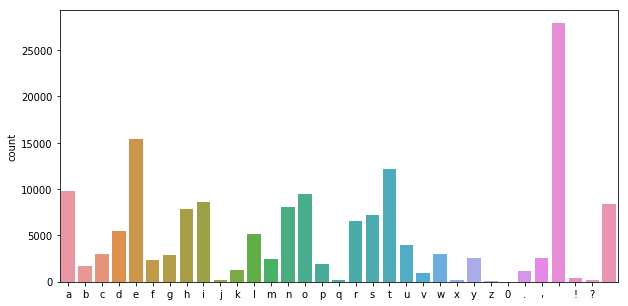

In [74]:
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
sn.countplot(np.array(dataY))
plt.xticks(np.arange(32),np.array(chars_new))

Xây dựng một kiến trúc model gồm một layer LSTM kết nối tới 1 layer Dropout và kết nối tới Dense layer ở cuối.

In [75]:
model = Sequential()
model.add(LSTM(256, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 33)                8481      
Total params: 272,673
Trainable params: 272,673
Non-trainable params: 0
_________________________________________________________________


In [76]:
filepath = 'weights-improvement-{epoch:02d}-{loss:.4f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')
callback_list = [checkpoint]

In [77]:
model.fit(X_train, y_train, epochs = 5, batch_size = 128, validation_split=0.33, callbacks = callback_list, verbose = 1)

Train on 109607 samples, validate on 53986 samples
Epoch 1/5
109607/109607 [==============================] - 408s 4ms/step - loss: 2.8991 - acc: 0.1820 - val_loss: 2.8783 - val_acc: 0.1869

Epoch 00001: val_acc improved from -inf to 0.18686, saving model to weights-improvement-01-2.8991.hdf5
Epoch 2/5
109607/109607 [==============================] - 406s 4ms/step - loss: 2.7600 - acc: 0.2182 - val_loss: 2.8217 - val_acc: 0.2149

Epoch 00002: val_acc improved from 0.18686 to 0.21489, saving model to weights-improvement-02-2.7600.hdf5
Epoch 3/5
109607/109607 [==============================] - 404s 4ms/step - loss: 2.6864 - acc: 0.2389 - val_loss: 2.7827 - val_acc: 0.2152

Epoch 00003: val_acc improved from 0.21489 to 0.21520, saving model to weights-improvement-03-2.6864.hdf5
Epoch 4/5
109607/109607 [==============================] - 405s 4ms/step - loss: 2.6287 - acc: 0.2517 - val_loss: 2.7331 - val_acc: 0.2350

Epoch 00004: val_acc improved from 0.21520 to 0.23499, saving model to wei

Dự báo kết quả từ tiếp theo từ một tập hợp kí tự đầu vào.

In [78]:
import numpy as np
base_word = 'Alice was beginning to get very tired of sitting by her sister on the bank'

def _predict_let(text, len_sen = 1):
    text_for = []
    for i in range(len_sen):
        x_input = np.array(_encode_sen(text)[-100:])/float(n_vocab)
        if x_input.shape[0] < 100:
            x_input = np.concatenate((np.zeros(100-x_input.shape[0]), x_input), axis = 0)
        x_input = np.expand_dims(np.expand_dims(x_input, -1), 0)
        y_prob = model.predict(x_input)
        y_let = int_to_chars[np.argmax(y_prob, axis = 1)[0]]
        text = text + y_let
    return text[len_sen:]

_predict_let(base_word, 100)

'nd the  and the  and the  and the  and the  and the  and the  and the  and t'

Kiến trúc BiLSTM.

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM, Input, Bidirectional
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.metrics import categorical_accuracy

#import spacy, and spacy english model
# spacy is used to work on text
import spacy
nlp = spacy.load('en')

#import other libraries
import numpy as np
import random
import sys
import os
import time
import codecs
import collections
from six.moves import cPickle

#define parameters used in the tutorial
data_dir = '../input'# data directory containing raw texts
# save_dir = 'save' # directory to store trained NN models
file_list = os.listdir('../input')
vocab_file = os.path.join("words_vocab.pkl")
sequences_step = 1 #step to create sequences

In [ ]:
def create_wordlist(doc):
    wl = []
    for word in doc:
        if word.text not in ("\n","\n\n",'\u2009','\xa0'):
            wl.append(word.text.lower())
    return wl

wordlist = []

for file_name in file_list:
    input_file = os.path.join(data_dir, file_name)
    #read data
    with codecs.open(input_file, "r") as f:
        data = f.read()
        
    #create sentences
    doc = nlp(data)
    wl = create_wordlist(doc)
    wordlist = wordlist + wl

In [ ]:
batch_size = 32 # minibatch size
num_epochs = 50 # number of epochs

callbacks=[EarlyStopping(patience=4, monitor='val_loss'),
           ModelCheckpoint(filepath=save_dir + "/" + 'my_model_gen_sentences.{epoch:02d}-{val_loss:.2f}.hdf5',\
                           monitor='val_loss', verbose=0, mode='auto', period=2)]
#fit the model
history = md.fit(X, y,
                 batch_size=batch_size,
                 shuffle=True,
                 epochs=num_epochs,
                 callbacks=callbacks,
                 validation_split=0.1)

#save the model
md.save(save_dir + "/" + 'my_model_generate_sentences.h5')batch_size = 32 # minibatch size
num_epochs = 50 # number of epochs

callbacks=[EarlyStopping(patience=4, monitor='val_loss'),
           ModelCheckpoint(filepath=save_dir + "/" + 'my_model_gen_sentences.{epoch:02d}-{val_loss:.2f}.hdf5',\
                           monitor='val_loss', verbose=0, mode='auto', period=2)]
#fit the model
history = md.fit(X, y,
                 batch_size=batch_size,
                 shuffle=True,
                 epochs=num_epochs,
                 callbacks=callbacks,
                 validation_split=0.1)

#save the model
md.save(save_dir + "/" + 'my_model_generate_sentences.h5')batch_size = 32 # minibatch size
num_epochs = 50 # number of epochs

callbacks=[EarlyStopping(patience=4, monitor='val_loss'),
           ModelCheckpoint(filepath=save_dir + "/" + 'my_model_gen_sentences.{epoch:02d}-{val_loss:.2f}.hdf5',\
                           monitor='val_loss', verbose=0, mode='auto', period=2)]
#fit the model
history = md.fit(X, y,
                 batch_size=batch_size,
                 shuffle=True,
                 epochs=num_epochs,
                 callbacks=callbacks,
                 validation_split=0.1)

#save the model
md.save(save_dir + "/" + 'my_model_generate_sentences.h5')len(wordlist[3]

In [ ]:
# count the number of words
word_counts = collections.Counter(wordlist)

# Mapping from index to word : that's the vocabulary
vocabulary_inv = [x[0] for x in word_counts.most_common()]
vocabulary_inv = list(sorted(vocabulary_inv))

# Mapping from word to index
vocab = {x: i for i, x in enumerate(vocabulary_inv)}
words = [x[0] for x in word_counts.most_common()]

#size of the vocabulary
vocab_size = len(words)
print("vocab size: ", vocab_size)

#save the words and vocabulary
with open(os.path.join(vocab_file), 'wb') as f:
    cPickle.dump((words, vocab, vocabulary_inv), f)

In [ ]:
#create sequences
sequences = []
next_words = []
for i in range(0, len(wordlist) - seq_length, sequences_step):
    sequences.append(wordlist[i: i + seq_length])
    next_words.append(wordlist[i + seq_length])

print('nb sequences:', len(sequences))

In [ ]:
X = np.zeros((len(sequences), seq_length, vocab_size), dtype=np.bool)
y = np.zeros((len(sequences), vocab_size), dtype=np.bool)
for i, sentence in enumerate(sequences):
    for t, word in enumerate(sentence):
        X[i, t, vocab[word]] = 1
    y[i, vocab[next_words[i]]] = 1

In [ ]:
print('X shape: ', X.shape)
print('y shape: ', y.shape)

In [ ]:
def bidirectional_lstm_model(seq_length, vocab_size):
    print('Build LSTM model.')
    model = Sequential()
    model.add(Bidirectional(LSTM(rnn_size, activation="relu"),input_shape=(seq_length, vocab_size)))
    model.add(Dropout(0.6))
    model.add(Dense(vocab_size))
    model.add(Activation('softmax'))
    
    optimizer = Adam(lr=learning_rate)
    callbacks=[EarlyStopping(patience=2, monitor='val_loss')]
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[categorical_accuracy])
    print("model built!")
    return model

rnn_size = 256 # size of RNN
seq_length = 100 # sequence length
learning_rate = 0.001 #learning rate

md = bidirectional_lstm_model(seq_length, vocab_size)
md.summary()

In [ ]:
batch_size = 32 # minibatch size
num_epochs = 50 # number of epochs

callbacks=[EarlyStopping(patience=4, monitor='val_loss'),
           ModelCheckpoint(filepath="/" + 'my_model_gen_sentences.{epoch:02d}-{val_loss:.2f}.hdf5',\
                           monitor='val_loss', verbose=0, mode='auto', period=2)]
#fit the model
history = md.fit(X, y,
                 batch_size=batch_size,
                 shuffle=True,
                 epochs=num_epochs,
                 callbacks=callbacks,
                 validation_split=0.1)

#save the model
md.save("/" + 'my_model_generate_sentences.h5')

# XI. Tài liệu

1. [Understanding - LSTMs - Christopher Olah](http://colah.github.io/posts/2015-08-Understanding-LSTMs)

2. [Leanring Long - Term Dependencies with Gradient Descent is Difficult](http://ai.dinfo.unifi.it/paolo//ps/tnn-94-gradient.pdf)

3. [(*Gated Recurrent Unit - GRU*)](https://arxiv.org/pdf/1406.1078v3.pdf)

4. [so sánh biến thể LSTM](https://arxiv.org/pdf/1503.04069.pdf)

5. [kiến trúc cổng sâu RNN (*Depth Gated RNN*)](https://arxiv.org/pdf/1508.03790v2.pdf) 